In [1]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai matplotlib seaborn

# Importing the libraries

In [2]:
from fastai.collab import *
from fastai.tabular.all import *
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading and viewing the data

In [3]:
path = untar_data(URLs.ML_100k)  # downloading the MovieLens dataset
df = pd.read_csv(path/'u.data', sep='\t', header=None,
                names=['user', 'item', 'rating', 'timestamp'])

df.head()  # viewing first 5 rows

,user,item,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


# Visualizing the Data

### Distribution of ratings

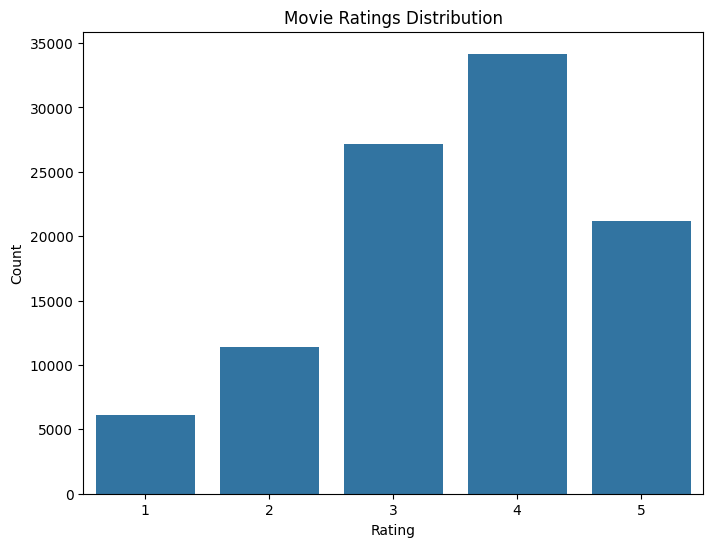

In [4]:
# For viewing distribution of ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df)
plt.title('Movie Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

### Distribution of number of ratings per user

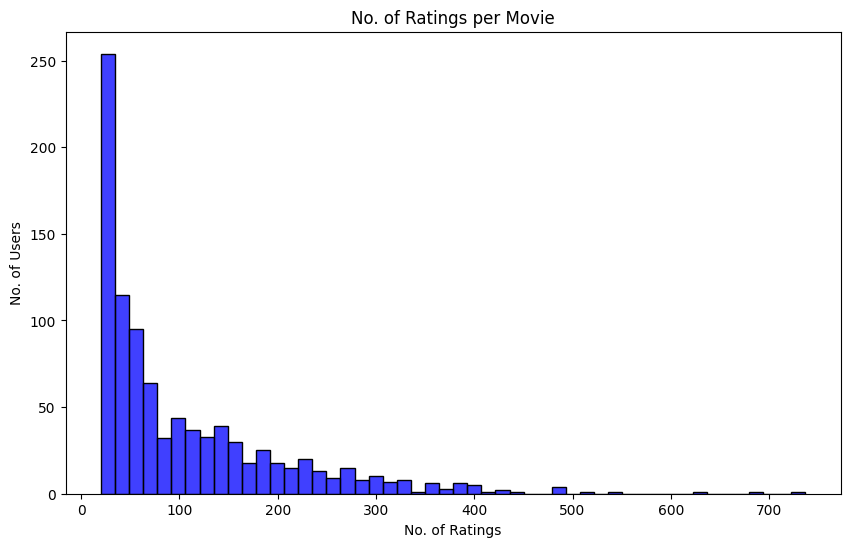

In [5]:
# For viewing number of ratings per user
plt.figure(figsize=(10, 6))
ratings_per_mov = df.groupby('user')['rating'].count()
sns.histplot(ratings_per_mov, bins=50, kde=False, color='blue')
plt.title('No. of Ratings per Movie')
plt.xlabel('No. of Ratings')
plt.ylabel('No. of Users')
plt.show()

# Filtering the Data

### Focusing on movies that have been rated more and users that have interacted more.

In [6]:
# movies that have more than 50 ratings
filtered_mov = ratings_per_mov[ratings_per_mov >= 50].index
filtered_df = df[df['item'].isin(filtered_mov)]

# users that have rated atleast 10 movies
ratings_per_user_filtered = filtered_df.groupby('user')['rating'].count()
filtered_users = ratings_per_user_filtered[ratings_per_user_filtered >= 10].index
filtered_df = filtered_df[filtered_df['user'].isin(filtered_users)]

# viewing first 5 rows of the filtered dataset
filtered_df.head()

,user,item,rating,timestamp
4,166,346,1,886397596
5,298,474,4,884182806
7,253,465,5,891628467
8,305,451,3,886324817
10,62,257,2,879372434


# Creating the Dataloaders

In [7]:
# CollabDataLoaders for collaborative filtering
dls = CollabDataLoaders.from_df(
    filtered_df, item_name='item', user_name='user', rating_name='rating')

# Training the model with collab_learner

In [8]:
# n_factors is number of latent factors such as genre, 
learn = collab_learner(dls, n_factors=50, y_range=(0, 5.5))
# scaling the predictions within 0-5.5 range to improve model performance

# epoch 5, learning_rate 5e-3 and weight decay 0.1
learn.fit_one_cycle(5, 5e-3, wd=0.1)  #  wd is a regularization to prevent overfitting

epoch,train_loss,valid_loss,time
0,0.930359,0.980490,00:07
1,0.675821,0.908537,00:06
2,0.505391,0.901510,00:07
3,0.420179,0.892078,00:06
4,0.415153,0.889078,00:06
